In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
import seaborn as sns
import xgboost as xgb
from pprint import pprint
from sklearn import tree, metrics, svm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Exercici 1 
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [2]:
columnes = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Prolin"]

df = pd.read_csv("wineData.txt", sep = ',', header=None, names=columnes)

df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Prolin
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [5]:
features = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Prolin"]
target = ["Class"]

X = df[features]
y = np.array(df[target]).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=42)

In [6]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

svmc = svm.SVC(kernel='linear')
svmc.fit(X_train, y_train)
y_pred_svmc = svmc.predict(X_test)

xg = xgb.XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
le = LabelEncoder()
y_train2 = le.fit_transform(y_train)
xg.fit(X_train, y_train2)
y_pred_xg = xg.predict(X_test)+1

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train_scaled, y_train)
y_pred_knc = knc.predict(X_test_scaled)

print(y_test)
prediccions = [y_pred_dtc,y_pred_svmc,y_pred_knc,y_pred_xg,y_pred_lr]
print(prediccions)

[1 2 1 1 2 1 1 2 2 3 2 2 3 3 1 2 2 1 1 3 3 3 1 1 2 2 1 2 1 2 1 3 2 3 3 2 1
 3 3 2 3 2 1 2 2]
[array([1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 3,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 3, 2, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 2,
       2], dtype=int64), array([1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 3,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 2,
       2], dtype=int64), array([1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 3,
       1, 1, 3, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2, 1, 2,
       2], dtype=int64), array([1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 3,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2, 1, 2,
       2], dtype=int64), array([1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 3,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 2,
       2], dtype=int64)]


# Exercici 2 
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [7]:
#Accuracy

classificadors = [' -Decision Tree:         ',' -Support Vector Machine:',' -K-Nearest Neighbour:   ',' -XGBoost:               ',' -Logistic Regression:   ']
accuracy = []
print('Accuracy:')
i=0
for y_pred in prediccions:
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)
    print(classificadors[i],score)
    i+=1

Accuracy:
 -Decision Tree:          0.9555555555555556
 -Support Vector Machine: 0.9555555555555556
 -K-Nearest Neighbour:    0.9777777777777777
 -XGBoost:                1.0
 -Logistic Regression:    0.9555555555555556


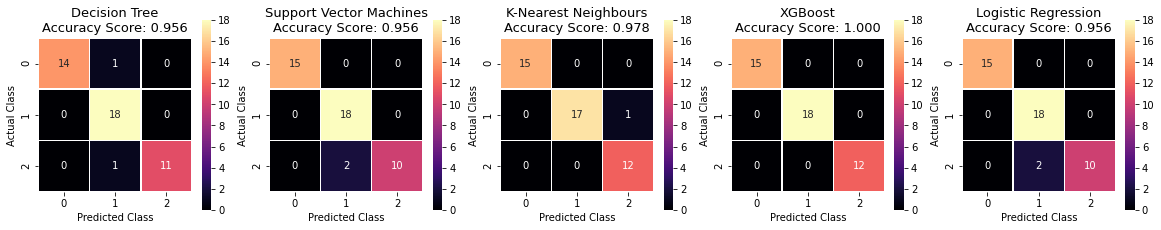

In [8]:
#Confusion matrix

i=0
cm = []
for y_pred in prediccions:
    matriu = metrics.confusion_matrix(y_test, y_pred)
    cm.append(matriu)
    i+=1

classificadors2 = ['Decision Tree','Support Vector Machines','K-Nearest Neighbours','XGBoost','Logistic Regression']

plt.figure(figsize=(20,5))
i=0

for matrix in cm:
    plt.subplot(1, 5, i+1)
    sns.heatmap(matrix, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    all_sample_title = classificadors2[i]+'\nAccuracy Score: {:.3f}'.format(accuracy[i])
    plt.title(all_sample_title, size = 13)
    i+=1



In [9]:
#Precision

precision = []
print('Precision:')
i=0
for y_pred in prediccions:
    score = metrics.precision_score(y_test, y_pred, average = None)
    precision.append(score)
    print(classificadors[i],score)
    i+=1

#Recall

print('\n')
recall = []
print('Recall:')
i=0
for y_pred in prediccions:
    score = metrics.recall_score(y_test, y_pred, average = None)
    recall.append(score)
    print(classificadors[i],score)
    i+=1

Precision:
 -Decision Tree:          [1.  0.9 1. ]
 -Support Vector Machine: [1.  0.9 1. ]
 -K-Nearest Neighbour:    [1.         1.         0.92307692]
 -XGBoost:                [1. 1. 1.]
 -Logistic Regression:    [1.  0.9 1. ]


Recall:
 -Decision Tree:          [0.93333333 1.         0.91666667]
 -Support Vector Machine: [1.         1.         0.83333333]
 -K-Nearest Neighbour:    [1.         0.94444444 1.        ]
 -XGBoost:                [1. 1. 1.]
 -Logistic Regression:    [1.         1.         0.83333333]


In [10]:
#F1 score

f1 = []
print('F1 score:')
i=0
for y_pred in prediccions:
    score = metrics.f1_score(y_test, y_pred, average = None)
    f1.append(score)
    print(classificadors[i],score)
    i+=1

F1 score:
 -Decision Tree:          [0.96551724 0.94736842 0.95652174]
 -Support Vector Machine: [1.         0.94736842 0.90909091]
 -K-Nearest Neighbour:    [1.         0.97142857 0.96      ]
 -XGBoost:                [1. 1. 1.]
 -Logistic Regression:    [1.         0.94736842 0.90909091]


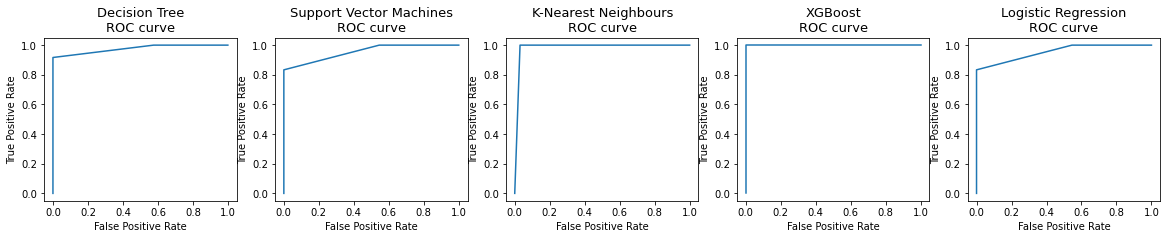

In [11]:
#ROC curve

classificadors2 = ['Decision Tree','Support Vector Machines','K-Nearest Neighbours','XGBoost','Logistic Regression']

plt.figure(figsize=(20,3))
i=0

for y_pred in prediccions:
    fpr, tpr, _ = metrics.roc_curve(y_test,  prediccions[i], pos_label=3)
    plt.subplot(1, 5, i+1)
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    all_sample_title = classificadors2[i]+'\nROC curve'
    plt.title(all_sample_title, size = 13)
    i+=1

In [12]:
from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[1, 2, 3])
n_classes = y.shape[1]

In [13]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = metrics.roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

print("\nauc scores")

lr_roc_auc_multiclass = roc_auc_score_multiclass(y_test, prediccions[0])
print(lr_roc_auc_multiclass)



auc scores
{1: 0.9666666666666667, 2: 0.962962962962963, 3: 0.9583333333333333}


# Exercici 3 
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [14]:
pprint(dtc.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\Plant\Programes\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
42 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Plant\Programes\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Plant\Programes\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "D:\Plant\Programes\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "D:\Plant\Programes\Anaconda\lib\site-packages\sklearn\utils\vali

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}
{'ccp_alpha': 0.05,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'splitter': 'best'}


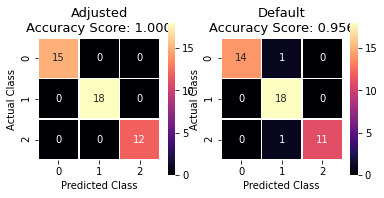

In [15]:
#Decision tree classifier hyperparameter tuning:
hyperparameters = {'criterion' : ['gini','entropy','log_loss'],
                   'splitter' : ['best','random'],
                   'max_depth' : range(1, 10),
                   'min_samples_split' : range(1,10),
                   'min_samples_leaf' : range(1,5),
                   'max_features' : [1,2,3,4,5,'auto','sqrt','log2',None],
                   'min_impurity_decrease' : [0.0,0.05,0.1,0.2,0.3,0.4,0.5],
                   'class_weight' : ['balanced',None],
                   'ccp_alpha' : [0.0,0.05,0.1,0.15,0.2]
                   }

dtc = tree.DecisionTreeClassifier(random_state=42)
dtc_random = RandomizedSearchCV(estimator = dtc, param_distributions = hyperparameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1) #El cv de 3 dóna millors resultats
dtc_random.fit(X_train, y_train)
dtc_random.best_params_
y_pred_dtc_best_params = dtc_random.predict(X_test)

plt.subplot(1, 2, 1)
matriu = metrics.confusion_matrix(y_test, y_pred_dtc_best_params)
sns.heatmap(matriu, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
score = metrics.accuracy_score(y_test, y_pred_dtc_best_params)
all_sample_title = 'Adjusted\nAccuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 13)

plt.subplot(1, 2, 2)
matriu = metrics.confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(matriu, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
score = metrics.accuracy_score(y_test, y_pred_dtc)
all_sample_title = 'Default\nAccuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 13)

pprint(dtc.get_params())
pprint(dtc_random.best_params_)


In [16]:
pprint(svmc.get_params())

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


Fitting 10 folds for each of 25 candidates, totalling 250 fits
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


Text(0.5, 1.0, 'Default\nAccuracy Score: 0.956')

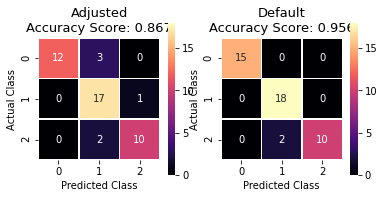

In [17]:
#svmc hyperparameter tuning:
hyperparameters = {'C': [0.1, 1, 10, 100, 1000], 
                    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                    'kernel': ['rbf']
                   }

svmc = svm.SVC()
svmc_random = GridSearchCV(estimator = svmc, refit = True, param_grid = hyperparameters, cv = 10, verbose=2, n_jobs = -1)
svmc_random.fit(X_train, y_train)
pprint(svmc_random.best_params_)
y_pred_svmc_best_params = svmc_random.predict(X_test)

plt.subplot(1, 2, 1)
matriu = metrics.confusion_matrix(y_test, y_pred_svmc_best_params)
sns.heatmap(matriu, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
score = metrics.accuracy_score(y_test, y_pred_svmc_best_params)
all_sample_title = 'Adjusted\nAccuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 13)

plt.subplot(1, 2, 2)
matriu = metrics.confusion_matrix(y_test, y_pred_svmc)
sns.heatmap(matriu, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
score = metrics.accuracy_score(y_test, y_pred_svmc)
all_sample_title = 'Default\nAccuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 13)

In [18]:
pprint(knc.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}


Fitting 10 folds for each of 84 candidates, totalling 840 fits
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}


Text(0.5, 1.0, 'Default\nAccuracy Score: 0.978')

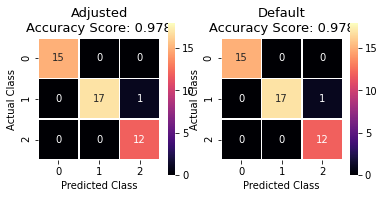

In [19]:
#knn hyperparameter tuning:
hyperparameters = { 'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                    'weights' : ['uniform','distance'],
                    'metric' : ['minkowski','euclidean','manhattan']
                  }

knc = KNeighborsClassifier()
knc_random = GridSearchCV(estimator = knc, refit = True, param_grid = hyperparameters, cv = 10, verbose=2, n_jobs = -1)
knc_random.fit(X_train_scaled, y_train)
pprint(knc_random.best_params_)
y_pred_knc_best_params = knc_random.predict(X_test_scaled)

plt.subplot(1, 2, 1)
matriu = metrics.confusion_matrix(y_test, y_pred_knc_best_params)
sns.heatmap(matriu, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
score = metrics.accuracy_score(y_test, y_pred_knc_best_params)
all_sample_title = 'Adjusted\nAccuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 13)

plt.subplot(1, 2, 2)
matriu = metrics.confusion_matrix(y_test, y_pred_knc)
sns.heatmap(matriu, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
score = metrics.accuracy_score(y_test, y_pred_knc)
all_sample_title = 'Default\nAccuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 13)

In [20]:
pprint(xg.get_params())

{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 400,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'multi:softprob',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}


Fitting 10 folds for each of 3840 candidates, totalling 38400 fits
{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1}


Text(0.5, 1.0, 'Default\nAccuracy Score: 1.000')

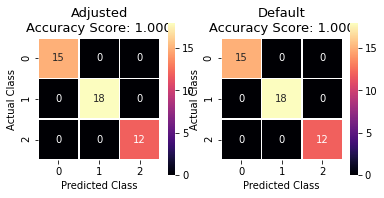

In [21]:
#xgboost hyperparameter tuning:
hyperparameters = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                   "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
                   "min_child_weight" : [ 1, 3, 5, 7 ],
                   "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                   "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
                  }

xg = xgb.XGBClassifier()
xg_random = GridSearchCV(estimator = xg, refit = True, param_grid = hyperparameters, cv = 10, verbose=2, n_jobs = -1)
xg_random.fit(X_train, y_train2)
pprint(xg_random.best_params_)
y_pred_xg_best_params = xg_random.predict(X_test)+1

plt.subplot(1, 2, 1)
matriu = metrics.confusion_matrix(y_test, y_pred_xg_best_params)
sns.heatmap(matriu, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
score = metrics.accuracy_score(y_test, y_pred_xg_best_params)
all_sample_title = 'Adjusted\nAccuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 13)

plt.subplot(1, 2, 2)
matriu = metrics.confusion_matrix(y_test, y_pred_xg)
sns.heatmap(matriu, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
score = metrics.accuracy_score(y_test, y_pred_xg)
all_sample_title = 'Default\nAccuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 13)

In [22]:
pprint(lr.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


D:\Plant\Programes\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Plant\Programes\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Plant\Programes\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Plant\Programes\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    rai

{'C': 3792.690190732246,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear'}


Text(0.5, 1.0, 'Default\nAccuracy Score: 0.956')

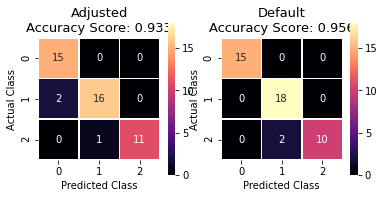

In [23]:
#lr hyperparameter tuning:
hyperparameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                   'C' : np.logspace(-4, 4, 20),
                   'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                   'max_iter' : [100, 1000, 2500, 5000, 7000, 10000, 15000]
                  }

lr = LogisticRegression()
lr_random = GridSearchCV(estimator = lr, refit = True, param_grid = hyperparameters, cv = 10, verbose=2, n_jobs = -1)
lr_random.fit(X_train, y_train)
pprint(lr_random.best_params_)
y_pred_lr_best_params = lr_random.predict(X_test)

plt.subplot(1, 2, 1)
matriu = metrics.confusion_matrix(y_test, y_pred_lr_best_params)
sns.heatmap(matriu, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
score = metrics.accuracy_score(y_test, y_pred_lr_best_params)
all_sample_title = 'Adjusted\nAccuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 13)

plt.subplot(1, 2, 2)
matriu = metrics.confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matriu, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
score = metrics.accuracy_score(y_test, y_pred_lr)
all_sample_title = 'Default\nAccuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 13)

# Exercici 4 
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [24]:
kfold_validation = KFold(10)
dtc = tree.DecisionTreeClassifier(random_state=42)
svmc = svm.SVC()
xg = xgb.XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
lr = LogisticRegression(max_iter=10000)
knc = KNeighborsClassifier(n_neighbors=10)

X = df[features]
y = np.array(df[target]).ravel()
le = LabelEncoder()
y2 = le.fit_transform(y)


print("Accuracy:                 Cross validation       Train-test")
print(classificadors[0], np.mean(cross_val_score(dtc, X, y, cv = 10)), accuracy[0])
print(classificadors[1], np.mean(cross_val_score(svmc, X, y, cv = 10)), accuracy[1])
print(classificadors[2], np.mean(cross_val_score(knc, X, y, cv = 10)), accuracy[2])
print(classificadors[3], np.mean(cross_val_score(xg, X, y2, cv = 10)), accuracy[3])
print(classificadors[4], np.mean(cross_val_score(lr, X, y, cv = 10)), accuracy[4])



Accuracy:                 Cross validation       Train-test
 -Decision Tree:          0.865032679738562 0.9555555555555556
 -Support Vector Machine: 0.681045751633987 0.9555555555555556
 -K-Nearest Neighbour:    0.6973856209150326 0.9777777777777777
 -XGBoost:                0.9666666666666666 1.0
 -Logistic Regression:    0.9666666666666666 0.9555555555555556


# Exercici 5 
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

In [25]:
#Standarization:

In [32]:
X = df[features]
y = np.array(df[target]).reshape(-1)
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=columnes[1:])
print(X_scaled.head())
print(X_scaled.info())
print(X_scaled.describe().transpose())

print(X_scaled)
print(y)

    Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color intensity       Hue  OD280/OD315 of diluted wines    Prolin  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y, test_size=0.25, random_state=42)

dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

svmc = svm.SVC(kernel='linear')
svmc.fit(X_train, y_train)
y_pred_svmc = svmc.predict(X_test)

xg = xgb.XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
le = LabelEncoder()
y_train2 = le.fit_transform(y_train)
xg.fit(X_train, y_train2)
y_pred_xg = xg.predict(X_test)+1

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train_scaled, y_train)
y_pred_knc = knc.predict(X_test_scaled)

print(y_test)
prediccions = [y_pred_dtc,y_pred_svmc,y_pred_knc,y_pred_xg,y_pred_lr]
print(prediccions)

[1 2 1 1 2 1 1 2 2 3 2 2 3 3 1 2 2 1 1 3 3 3 1 1 2 2 1 2 1 2 1 3 2 3 3 2 1
 3 3 2 3 2 1 2 2]
[array([1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 1, 2, 1, 1, 3, 3, 3,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2, 1, 2,
       2], dtype=int64), array([1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 1, 2, 1, 1, 3, 3, 3,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 2,
       2], dtype=int64), array([1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 3,
       1, 1, 3, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2, 1, 2,
       2], dtype=int64), array([1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 3,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2, 1, 2,
       2], dtype=int64), array([1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 3,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 2,
       2], dtype=int64)]


Accuracy:
 -Decision Tree:          0.9555555555555556
 -Support Vector Machine: 0.9555555555555556
 -K-Nearest Neighbour:    0.9777777777777777
 -XGBoost:                1.0
 -Logistic Regression:    0.9777777777777777


Precision:
 -Decision Tree:          [0.93333333 0.94444444 1.        ]
 -Support Vector Machine: [0.9375     0.94444444 1.        ]
 -K-Nearest Neighbour:    [1.         1.         0.92307692]
 -XGBoost:                [1. 1. 1.]
 -Logistic Regression:    [1.         0.94736842 1.        ]


Recall:
 -Decision Tree:          [0.93333333 0.94444444 1.        ]
 -Support Vector Machine: [1.         0.94444444 0.91666667]
 -K-Nearest Neighbour:    [1.         0.94444444 1.        ]
 -XGBoost:                [1. 1. 1.]
 -Logistic Regression:    [1.         1.         0.91666667]


F1 score:
 -Decision Tree:          [0.93333333 0.94444444 1.        ]
 -Support Vector Machine: [0.96774194 0.94444444 0.95652174]
 -K-Nearest Neighbour:    [1.         0.97142857 0.96      ]


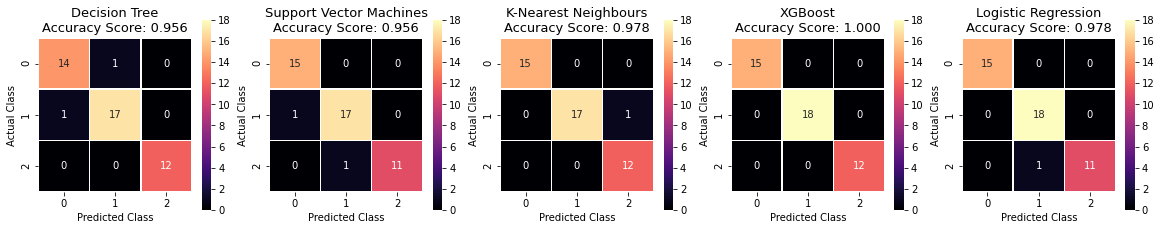

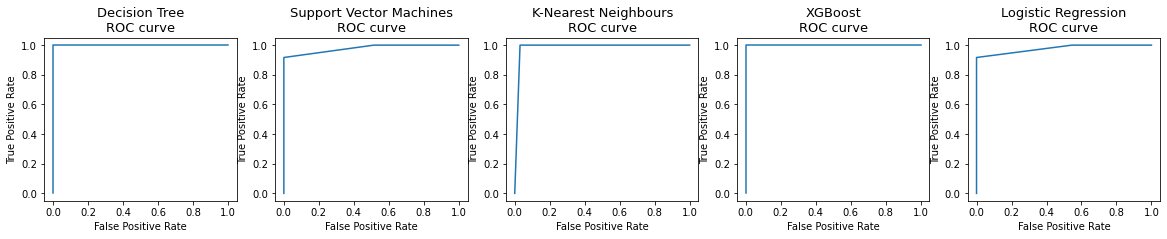

In [37]:
#Accuracy

classificadors = [' -Decision Tree:         ',' -Support Vector Machine:',' -K-Nearest Neighbour:   ',' -XGBoost:               ',' -Logistic Regression:   ']
accuracy = []
print('Accuracy:')
i=0
for y_pred in prediccions:
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)
    print(classificadors[i],score)
    i+=1

#Confusion matrix

i=0
cm = []
for y_pred in prediccions:
    matriu = metrics.confusion_matrix(y_test, y_pred)
    cm.append(matriu)
    i+=1

classificadors2 = ['Decision Tree','Support Vector Machines','K-Nearest Neighbours','XGBoost','Logistic Regression']

plt.figure(figsize=(20,5))
i=0

for matrix in cm:
    plt.subplot(1, 5, i+1)
    sns.heatmap(matrix, vmin = 0, vmax = 18, annot=True, cbar_kws = {'shrink':0.7}, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    all_sample_title = classificadors2[i]+'\nAccuracy Score: {:.3f}'.format(accuracy[i])
    plt.title(all_sample_title, size = 13)
    i+=1

#Precision

precision = []
print('\n')
print('Precision:')
i=0
for y_pred in prediccions:
    score = metrics.precision_score(y_test, y_pred, average = None)
    precision.append(score)
    print(classificadors[i],score)
    i+=1

#Recall

print('\n')
recall = []
print('Recall:')
i=0
for y_pred in prediccions:
    score = metrics.recall_score(y_test, y_pred, average = None)
    recall.append(score)
    print(classificadors[i],score)
    i+=1
    
#F1 score

f1 = []
print('\n')
print('F1 score:')
i=0
for y_pred in prediccions:
    score = metrics.f1_score(y_test, y_pred, average = None)
    f1.append(score)
    print(classificadors[i],score)
    i+=1

#ROC curve

classificadors2 = ['Decision Tree','Support Vector Machines','K-Nearest Neighbours','XGBoost','Logistic Regression']

plt.figure(figsize=(20,3))
i=0

for y_pred in prediccions:
    fpr, tpr, _ = metrics.roc_curve(y_test,  prediccions[i], pos_label=3)
    plt.subplot(1, 5, i+1)
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    all_sample_title = classificadors2[i]+'\nROC curve'
    plt.title(all_sample_title, size = 13)
    i+=1

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = metrics.roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

print("\nauc scores")

lr_roc_auc_multiclass = roc_auc_score_multiclass(y_test, prediccions[0])
print(lr_roc_auc_multiclass)

print('\n')
print('Ha augmentat una mica la predicció de la regressió logística.')